In [1]:
import numpy as np

#加载数据
data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

#标准化
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [2]:
N, M = x.shape

w = np.ones(M)
b = 0

S_w = np.zeros(M)
S_b = 0

v_w = np.zeros(M)
v_b = 0

In [3]:
def predict(x):
    return w.dot(x) + b


predict(x[0])

0.6590042695516543

In [4]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y)**2
    return loss


get_loss(x[0], y[0])

0.21258140154187277

In [5]:
def get_gradient(x, y):
    global w
    global b

    eps = 1e-3

    loss_before = get_loss(x, y)

    gradient_w = np.empty(M)
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps

    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps

    return gradient_w, gradient_b


get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [6]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss

total_loss()

11073.905141728206

In [7]:
plt_x = []
plt_y = []

for t in range(1, 5500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])

    v_w = 0.9 * v_w + 0.1 * gradient_w
    v_b = 0.9 * v_b + 0.1 * gradient_b

    S_w = 0.999 * S_w + 0.001 * gradient_w**2
    S_b = 0.999 * S_b + 0.001 * gradient_b**2

    # 根据以上公式, 在时刻0
    # v = [0.1 * gradient_0]

    # 可能太过于小, 为了消除这个影响,需要做偏差修正,也就是除以系数
    # v = 0.1 * sigma[0.9**(t-i) * gradient_i]
    # S = 0.001 * sigma[0.999**(t-i) * gradient_i**2]
    
    # 将梯度的系数部分整理得到
    # 0.1 * sigma[0.9**(t-i)] = 1-0.9**t

    # 偏差修正
    v_hat_w = v_w / (1 - 0.9**t)
    v_hat_b = v_b / (1 - 0.9**t)
    S_hat_w = S_w / (1 - 0.999**t)
    S_hat_b = S_b / (1 - 0.999**t)

    gradient_w = (1e-2 * v_hat_w) / (S_hat_w**0.5 + 1e-6)
    gradient_b = (1e-2 * v_hat_b) / (S_hat_b**0.5 + 1e-6)

    w -= gradient_w
    b -= gradient_b

    plt_x.append(t)
    plt_y.append(total_loss())

    if t % 500 == 0:
        print(t, v_hat_w[:2], S_hat_w[:2], total_loss())

500 [1.10115808 0.25958638] [16.62514305 11.94498442] 1049.0231655861412
1000 [-1.10195817 -0.0064765 ] [8.27378371 6.41576294] 750.9852086650071
1500 [ 0.31481282 -0.23062141] [5.48831362 4.54166285] 752.1386666763223
2000 [ 0.05525845 -0.30745454] [4.51858982 3.52764516] 738.0062748911085
2500 [-0.13626825  0.18230391] [4.34240055 2.89563293] 744.000446381704
3000 [ 0.04739513 -0.05747044] [3.66314468 2.54602908] 737.253370111261
3500 [0.07398062 0.13785881] [3.29008634 2.87398787] 758.2849145415161
4000 [ 0.09878398 -0.0906673 ] [2.84223265 2.55469972] 770.6138858026964
4500 [-1.56633349  0.3774447 ] [3.74152783 2.78455359] 755.847436134114
5000 [ 0.36259469 -1.16145261] [3.21255693 2.73597896] 748.5407315553005


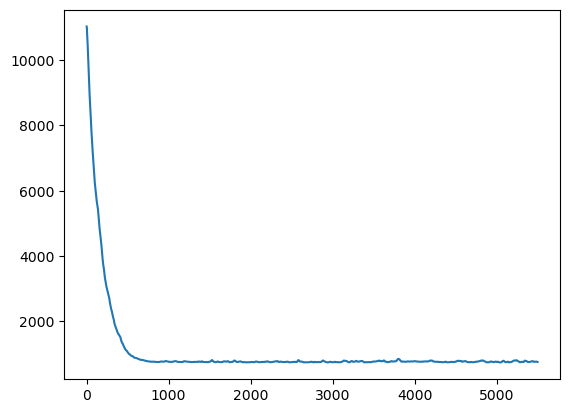

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()